<a href="https://colab.research.google.com/github/Koyelisha/Mathematics/blob/main/Batch_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import torch
from matplotlib import pyplot as plt

In [41]:
xs = torch.tensor([0,1,2,3,4,5,6,7.])
xs

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [42]:
ys = torch.tensor([1.86,1.31,0.62,.33,.09,-.67,-1.23,-1.37])
ys

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

In [43]:
def regression(my_x,my_m,my_b):
  return my_m*my_x+my_b

In [44]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

In [45]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [46]:
yhat = regression(xs,m,b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

In [47]:
def mse(yhat,y):
  sigma = torch.sum((yhat-y)**2)
  return sigma/len(y)

In [48]:
C = mse(yhat,ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

In [49]:
C.backward()

In [50]:
m.grad

tensor([36.3050])

In [51]:
b.grad

tensor([6.2650])

In [63]:
delcdelm = 2/len(xs)*torch.sum((yhat-ys)*xs)
delcdelm
#delcdelm==m.grad

tensor(826292.8125, grad_fn=<MulBackward0>)

In [62]:
delcdelb = 2/len(xs)*torch.sum(yhat-ys)
delcdelb
#delcdelb==b.grad

tensor(171881.6875, grad_fn=<MulBackward0>)

In [64]:
optimizer = torch.optim.SGD([m,b],lr=0.01)

In [74]:
epochs=1000
for epoch in range(epochs):
  optimizer.zero_grad()
  yhat = regression(xs,m,b)
  C = mse(yhat,ys)
  C.backward()
  optimizer.step()
  print(f'epoch {epoch}, m={m.item()}, b={b.item()}, C={C.item()}')

epoch 0, m=-2.046428918838501, b=9.515814781188965, C=18.287113189697266
epoch 1, m=-2.0373358726501465, b=9.471098899841309, C=18.077077865600586
epoch 2, m=-2.0282952785491943, b=9.426640510559082, C=17.869455337524414
epoch 3, m=-2.0193068981170654, b=9.382438659667969, C=17.66421890258789
epoch 4, m=-2.0103702545166016, b=9.338491439819336, C=17.461345672607422
epoch 5, m=-2.0014851093292236, b=9.294797897338867, C=17.26080322265625
epoch 6, m=-1.992651104927063, b=9.25135612487793, C=17.06256675720215
epoch 7, m=-1.98386812210083, b=9.20816421508789, C=16.866613388061523
epoch 8, m=-1.9751358032226562, b=9.16522216796875, C=16.67290496826172
epoch 9, m=-1.9664537906646729, b=9.122527122497559, C=16.481428146362305
epoch 10, m=-1.9578218460083008, b=9.080078125, C=16.292152404785156
epoch 11, m=-1.9492396116256714, b=9.037874221801758, C=16.105051040649414
epoch 12, m=-1.9407069683074951, b=8.9959135055542, C=15.920101165771484
epoch 13, m=-1.9322234392166138, b=8.954195022583008, 

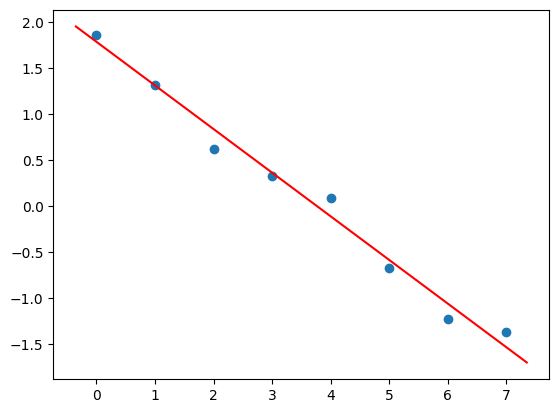

In [80]:
fig,ax = plt.subplots()
plt.scatter(xs,ys)
xmin,xmax = ax.get_xlim()
ymax = m*xmax + b
ymin = m*xmin + b
plt.plot(torch.tensor([xmin,xmax]),torch.tensor([ymin,ymax]),color='red')